### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in Data

In [2]:
df = pd.read_csv("RawData.csv")

/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_79884/1650942682.py:1: DtypeWarning: Columns (12,18,19,22,23,24,25,48,59,60,61,77,79,80,81,82,105,106,108,111,114,115,116,117,122,129,132,133,134,135,151) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


### Explore Data

In [3]:
df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WA\nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Country,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project (Vintage),1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,1996.1,1997.1,1998.1,1999.1,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1,2023.1,Year \nUnknown,1996.2,1997.2,1998.2,1999.2,2000.2,2001.2,2002.2,2003.2,2004.2,2005.2,2006.2,2007.2,2008.2,2009.2,2010.2,2011.2,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2,2022.2,2023.2,Project Owner,Offset Project Operator,Authorized Project Designee,Verifier,Estimated Annual Emission Reductions,PERs,Registry / ARB / WA,ARB Project Detail,ARB ID,PoA ID/Aggregate ID,CORSIA Eligible,Project Listed,Project Registered,CCB / Certifications,Project Type From the Registry,Registry \nDocuments,Project Website,1996.3,1997.3,1998.3,1999.3,2000.3,2001.3,2002.3,2003.3,2004.3,2005.3,2006.3,2007.3,2008.3,2009.3,2010.3,2011.3,2012.3,2013.3,2014.3,2015.3,2016.3,2017.3,2018.3,2019.3,2020.3,2021.3,2022.3,2023.3,Notes from Registry,Notes from Berkeley Carbon Trading Project,Added to Database Version - With Data Through,star,Unnamed: 155,"1st issuance yr (no hard code, hide)",Ind
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,Mali,Niono District,Niono,Katene Kadji,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,,NaN,NaN,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,https://acr2.apx.com/myModule/rpt/myrpt.asp?r=111,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,v1 12-2020,star,NaN,0,1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,United States,OREGON,Beaverton,Nike,"7,984,006","17,666","7,966,340",0,NaN,NaN,2003.0,0,0,0,0,0,0,0,"1,898,382","3,004,613","3,081,011",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"5,000","1,966",400,"10,025",275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"1,890,716","3,004,613","3,071,011",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,ERT,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,No,NaN,NaN,NaN,Industrial Gas Substitution,https://acr2.apx.com/myModule/rpt/myrpt.asp?r=111,NaN,0,0,0,0,0,0,0,0,0,"1,898,000","6,086,006",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,v1 12-2020,star,NaN,2003,1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,United States,CALIFORNIA,Chino,Inland Empire Utilities Agency,"44,202","28,636","15,566",0,NaN,NaN,2003.0,0,0,0,0,0,0,0,"8,072","5,848","4,409","3,632","7,998","13,210","1,033",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0,134,0,0,"13,850","10,490",147,"3,917",0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"5,572","5,816","4,178",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Ruby Canyon Environment,NaN,NaN,ACR,Not ARB or Ecology Eligible,NaN,NaN,No,NaN,NaN,NaN,Livestock Waste Management,https://acr2.apx.com/myModule/rpt/myrpt.asp?r=111,NaN,0,0,0,0,0,0,0,0,0,"13,848","4,481",0,"11,630",0,"14,243",0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,v1 12-2020,NaN,NaN,2003,1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impe

In [4]:
df.dtypes

Project ID                                        object
Project Name                                      object
Voluntary Registry                                object
ARB/WA\nProject                                   object
Voluntary Status                                  object
Scope                                             object
 Type                                             object
Reduction / Removal                               object
Methodology / Protocol                            object
Region                                            object
Country                                           object
State                                             object
Project Site Location                             object
Project Developer                                 object
Total Credits \nIssued                            object
Total Credits \nRetired                           object
Total Credits Remaining                           object
Total Buffer \nPool Deposits   

Yearly Values

In [5]:
df['2001'].value_counts()

2001
0          8763
718,342       1
114,478       1
125,000       1
4,468         1
8,560         1
93,534        1
55,013        1
22,692        1
6,479         1
3,629         1
17,681        1
4,099         1
77,699        1
122,509       1
Name: count, dtype: int64

In [6]:
df['2001.1'].value_counts()

2001.1
0    8777
Name: count, dtype: int64

In [7]:
df['2001.2'].value_counts()

2001.2
0          8768
5             2
629,377       1
114,478       1
125,000       1
4,468         1
8,560         1
34,500        1
77,584        1
Name: count, dtype: int64

Categorical Variables

In [8]:
df['Scope'].value_counts()

Scope
Household & Community       2481
Renewable Energy            2339
Forestry & Land Use         1530
Agriculture                  923
Waste Management             604
Chemical Processes           445
Industrial & Commercial      338
Transportation               105
Carbon Capture & Storage      12
Name: count, dtype: int64

In [9]:
df[' Type'].value_counts()

 Type
Cookstoves                                           1368
Wind                                                 1013
Improved Forest Management                            713
Hydropower                                            528
Afforestation/Reforestation                           440
Manure Methane Digester                               439
Clean Water                                           395
Landfill Methane                                      377
Solar - Centralized                                   313
Rice Emission Reductions                              290
Ozone Depleting Substances Recovery & Destruction     285
Biomass                                               279
Community Boreholes                                   259
REDD+                                                 248
Biodigesters                                          242
Bundled Energy Efficiency                             154
Sustainable Agriculture                               149
Mine Met

### Create Plots Over Time

In [12]:
#Set first yearly value subset
df1 = df[['Project ID','Project Name', '1996', '1997', '1998', '1999', '2000',
         '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
         '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
         '2021', '2022', '2023']]
#Second yearly value subset
df2 = df[['Project ID','Project Name', '1996.1', '1997.1', '1998.1', '1999.1', '2000.1',
         '2001.1', '2002.1', '2003.1', '2004.1', '2005.1', '2006.1', '2007.1', '2008.1', '2009.1', '2010.1',
         '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1', '2018.1', '2019.1', '2020.1',
         '2021.1', '2022.1', '2023.1']]
#Third yearly value subset
df3 = df[['Project ID','Project Name', '1996.2', '1997.2', '1998.2', '1999.2', '2000.2',
         '2001.2', '2002.2', '2003.2', '2004.2', '2005.2', '2006.2', '2007.2', '2008.2', '2009.2', '2010.2',
         '2011.2', '2012.2', '2013.2', '2014.2', '2015.2', '2016.2', '2017.2', '2018.2', '2019.2', '2020.2',
         '2021.2', '2022.2', '2023.2']]
#Fourth yearly value subset
df4 = df[['Project ID','Project Name', '1996.3', '1997.3', '1998.3', '1999.3', '2000.3',
         '2001.3', '2002.3', '2003.3', '2004.3', '2005.3', '2006.3', '2007.3', '2008.3', '2009.3', '2010.3',
         '2011.3', '2012.3', '2013.3', '2014.3', '2015.3', '2016.3', '2017.3', '2018.3', '2019.3', '2020.3',
         '2021.3', '2022.3', '2023.3']]

Pivot each

In [13]:
df1_melt = pd.melt(df1, id_vars=['Project ID','Project Name'], 
                   var_name='Year', 
                   value_name='Credits issued by vintage year')
df2_melt = pd.melt(df2, id_vars=['Project ID','Project Name'], 
                   var_name='Year', 
                   value_name='Credits retired or cancelled')
df2_melt['Year'] = df2_melt['Year'].str.replace('.1', '')
df3_melt = pd.melt(df3, id_vars=['Project ID','Project Name'], 
                   var_name='Year', 
                   value_name='Credits remaining by vintage')
df3_melt['Year'] = df3_melt['Year'].str.replace('.2', '')
df4_melt = pd.melt(df4, id_vars=['Project ID','Project Name'], 
                   var_name='Year', 
                   value_name='Credits issued by issuance year')
df4_melt['Year'] = df4_melt['Year'].str.replace('.3', '')

Merge all dataframes together

In [14]:
# List of DataFrames to merge
dataframes = [df1_melt, df2_melt, df3_melt, df4_melt]
# Merge all DataFrames
dat = reduce(lambda left, right: pd.merge(left, right, on=['Project ID', 'Project Name', 'Year']), dataframes)
dat.head()

,Project ID,Project Name,Year,Credits issued by vintage year,Credits retired or cancelled,Credits remaining by vintage,Credits issued by issuance year
0,ACR101,AFOVERT Energy,1996,0,0,0,0
1,ACR102,Air Bag Gas Substitution,1996,0,0,0,0
2,ACR103,Inland Empire Anaerobic Ag Digester,1996,0,0,0,0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,1996,0,0,0,0
4,ACR105,Boa Vista A/R,1996,0,0,0,0


Wrangle the data to convert to integer

In [15]:
dat['Credits issued by vintage year'] = dat['Credits issued by vintage year'].astype(str)
dat['Credits issued by vintage year'] = dat['Credits issued by vintage year'].str.strip()
dat['Credits issued by vintage year'] = dat['Credits issued by vintage year'].str.replace(',', '').astype(float)

dat['Credits retired or cancelled'] = dat['Credits retired or cancelled'].astype(str)
dat['Credits retired or cancelled'] = dat['Credits retired or cancelled'].str.strip()
dat['Credits retired or cancelled'] = dat['Credits retired or cancelled'].str.replace(',', '').astype(float)

dat['Credits remaining by vintage'] = dat['Credits remaining by vintage'].astype(str)
dat['Credits remaining by vintage'] = dat['Credits remaining by vintage'].str.strip()
dat['Credits remaining by vintage'] = dat['Credits remaining by vintage'].str.replace(',', '').astype(float)

dat['Credits issued by issuance year'] = dat['Credits issued by issuance year'].astype(str)
dat['Credits issued by issuance year'] = dat['Credits issued by issuance year'].str.strip()
dat['Credits issued by issuance year'] = dat['Credits issued by issuance year'].str.replace(',', '').astype(float)

In [16]:
dat.head()

,Project ID,Project Name,Year,Credits issued by vintage year,Credits retired or cancelled,Credits remaining by vintage,Credits issued by issuance year
0,ACR101,AFOVERT Energy,1996,0.0,0.0,0.0,0.0
1,ACR102,Air Bag Gas Substitution,1996,0.0,0.0,0.0,0.0
2,ACR103,Inland Empire Anaerobic Ag Digester,1996,0.0,0.0,0.0,0.0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,1996,0.0,0.0,0.0,0.0
4,ACR105,Boa Vista A/R,1996,0.0,0.0,0.0,0.0


In [17]:
dat.dtypes

Project ID                          object
Project Name                        object
Year                                object
Credits issued by vintage year     float64
Credits retired or cancelled       float64
Credits remaining by vintage       float64
Credits issued by issuance year    float64
dtype: object

### Create an aggregated dataset of yearly variables

In [18]:
grouped_df = dat.groupby('Year')[['Credits issued by vintage year',
       'Credits retired or cancelled', 'Credits remaining by vintage',
       'Credits issued by issuance year']].sum()

In [19]:
grouped_df = grouped_df.reset_index()
grouped_df.tail()

,Year,Credits issued by vintage year,Credits retired or cancelled,Credits remaining by vintage,Credits issued by issuance year
23,2019,211140100.0,70140291.0,122990449.0,175259488.0
24,2020,193500087.0,165460224.0,136151217.0,222700035.0
25,2021,165350938.0,160988229.0,127422200.0,299794300.0
26,2022,93740553.0,156587716.0,84692830.0,285233966.0
27,2023,12090658.0,165915010.0,11503223.0,275647902.0


Analyze Distributions

<Axes: >

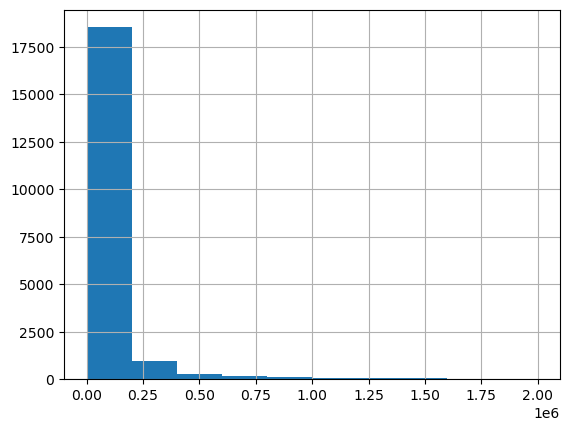

In [20]:
dat_pos = dat[(dat['Credits issued by vintage year']>0)&(dat['Credits issued by vintage year']<2000000)]
dat_pos['Credits issued by vintage year'].hist()

In [21]:
dat_pos = dat[dat['Credits issued by vintage year']>0]
dat_big = dat_pos[dat_pos['Credits issued by vintage year']<2000000]

Identify percent of projects that were above 0 and below 2000000

In [22]:
dat_big.shape[0]/dat_pos.shape[0]

0.9942424093302495

In [23]:
dat[dat['Credits issued by vintage year']==0].shape[0]/dat.shape[0]

0.9173122934943603

### Visualizations

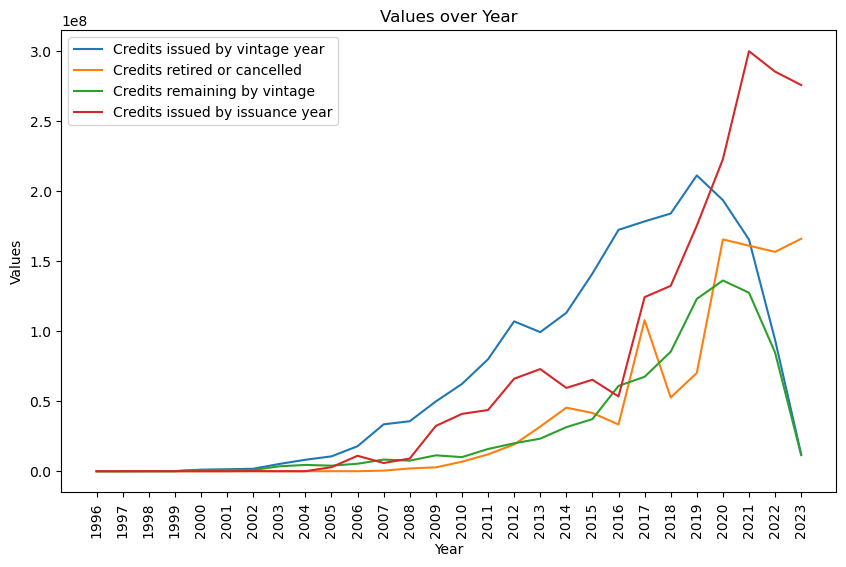

In [24]:
# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each column
plt.plot(grouped_df['Year'], grouped_df['Credits issued by vintage year'], label='Credits issued by vintage year')
plt.plot(grouped_df['Year'], grouped_df['Credits retired or cancelled'], label='Credits retired or cancelled')
plt.plot(grouped_df['Year'], grouped_df['Credits remaining by vintage'], label='Credits remaining by vintage')
plt.plot(grouped_df['Year'], grouped_df['Credits issued by issuance year'], label='Credits issued by issuance year')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Values over Year')
plt.tick_params(axis='x', labelrotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()

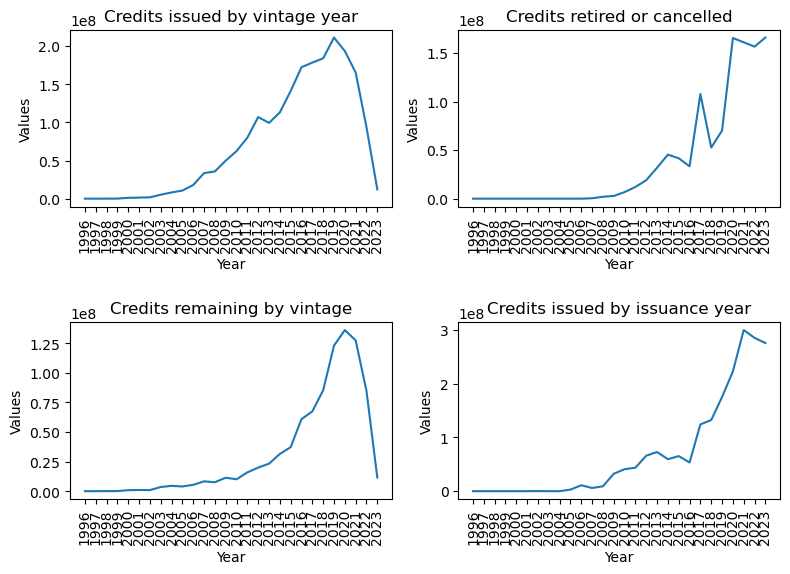

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))  # Create a 2x2 grid of subplots

# Plot each column in a subplot
axs[0, 0].plot(grouped_df['Year'], grouped_df['Credits issued by vintage year'])
axs[0, 0].set_title('Credits issued by vintage year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Values')
axs[0, 0].tick_params(axis='x', labelrotation=90)

axs[0, 1].plot(grouped_df['Year'], grouped_df['Credits retired or cancelled'])
axs[0, 1].set_title('Credits retired or cancelled')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Values')
axs[0, 1].tick_params(axis='x', labelrotation=90)

axs[1, 0].plot(grouped_df['Year'], grouped_df['Credits remaining by vintage'])
axs[1, 0].set_title('Credits remaining by vintage')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Values')
axs[1, 0].tick_params(axis='x', labelrotation=90)

axs[1, 1].plot(grouped_df['Year'], grouped_df['Credits issued by issuance year'])
axs[1, 1].set_title('Credits issued by issuance year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Values')
axs[1, 1].tick_params(axis='x', labelrotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
df.columns = df.columns.str.replace('\n', '')

In [29]:
df_noyear = df[['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WAProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region','Country', 'State', 'Project Site Location', 'Project Developer',
       'Total Credits Issued', 'Total Credits Retired','Total Credits Remaining', 'Total Buffer Pool Deposits',
       'Reversals Covered by Buffer Pool', 'Reversals Not Covered by Buffer','First Year of Project (Vintage)',
        'Project Owner ', 'Offset Project Operator ',
       'Authorized Project Designee', 'Verifier',
       'Estimated Annual Emission Reductions', ' PERs ', 'Registry / ARB / WA',
       'ARB Project Detail', 'ARB ID', 'PoA ID/Aggregate ID',
       'CORSIA Eligible', 'Project Listed', 'Project Registered ',
       'CCB / Certifications', 'Project Type From the Registry', 'Registry Documents']]
df_all_piv = pd.merge(df_noyear,dat, on=['Project ID', 'Project Name'], how='outer')

### Analyze Correlations

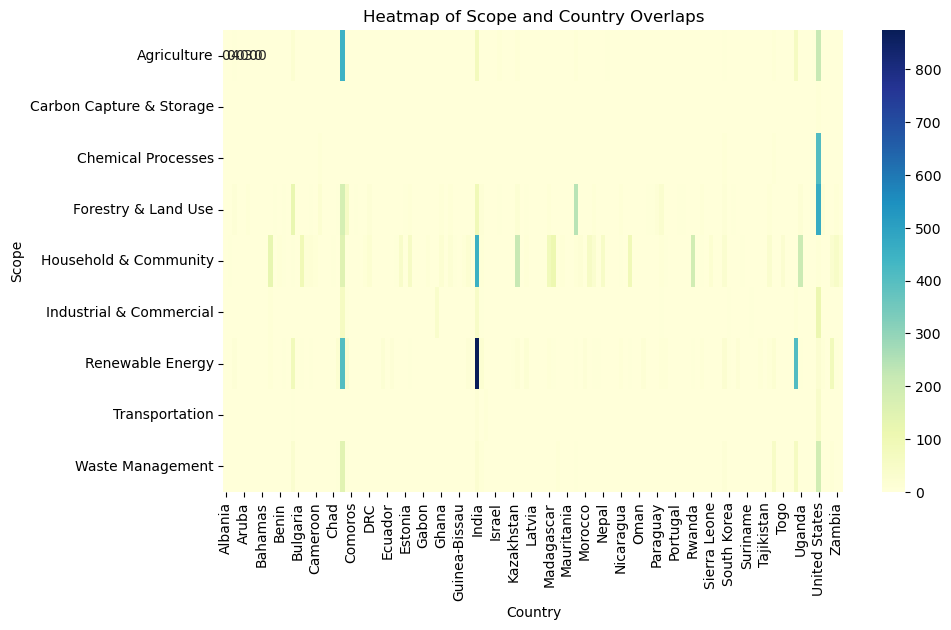

In [30]:
# Create a pivot table to count overlaps between 'Source' and 'Country'
pivot_table = df.pivot_table(index='Scope', columns='Country', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Scope and Country Overlaps')
plt.show()

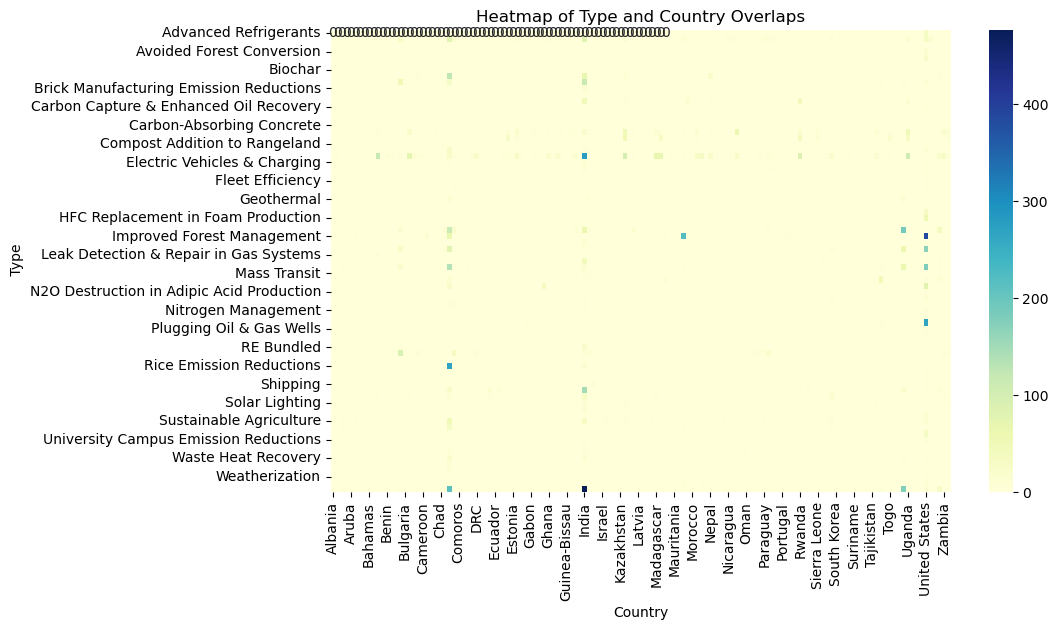

In [31]:
# Create a pivot table to count overlaps between 'Source' and 'Country'
pivot_table = df.pivot_table(index=' Type', columns='Country', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Type and Country Overlaps')
plt.show()

## Initial NLP

In [4]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [7]:
def find_similar_categories(categories, threshold=50):
    similar_pairs = []
    for category in categories:
        matches = process.extract(category, categories, scorer=fuzz.ratio)
        for match in matches:
            if match[1] >= threshold and match[0] != category:
                similar_pairs.append((category, match[0], match[1]))
    return similar_pairs

In [10]:
unique_categories = df[' Type'].unique()
similar_categories = find_similar_categories(unique_categories, threshold=60)
for pair in similar_categories:
    print(f"'{pair[0]}' and '{pair[1]}' have a similarity score of {pair[2]}")

'Bundled Energy Efficiency' and 'Energy Efficiency' have a similarity score of 81
'Bundled Energy Efficiency' and 'Fleet Efficiency' have a similarity score of 68
'Manure Methane Digester' and 'Mine Methane Capture' have a similarity score of 65
'Afforestation/Reforestation' and 'Wetland Restoration' have a similarity score of 61
'Carbon Capture & Enhanced Oil Recovery' and 'Carbon Capture in Cement' have a similarity score of 61
'Carbon Capture & Enhanced Oil Recovery' and 'Carbon Capture in Plastic' have a similarity score of 60
'Fleet Efficiency' and 'Energy Efficiency' have a similarity score of 79
'Fleet Efficiency' and 'Bundled Energy Efficiency' have a similarity score of 68
'Solar - Distributed' and 'Solar - Centralized' have a similarity score of 68
'Truck Stop Electrification' and 'Natural Gas Electricity Generation' have a similarity score of 60
'Energy Efficiency' and 'Bundled Energy Efficiency' have a similarity score of 81
'Energy Efficiency' and 'Fleet Efficiency' have a

In [11]:
similar_categories

[('Bundled Energy Efficiency', 'Energy Efficiency', 81),
 ('Bundled Energy Efficiency', 'Fleet Efficiency', 68),
 ('Manure Methane Digester', 'Mine Methane Capture', 65),
 ('Afforestation/Reforestation', 'Wetland Restoration', 61),
 ('Carbon Capture & Enhanced Oil Recovery', 'Carbon Capture in Cement', 61),
 ('Carbon Capture & Enhanced Oil Recovery', 'Carbon Capture in Plastic', 60),
 ('Fleet Efficiency', 'Energy Efficiency', 79),
 ('Fleet Efficiency', 'Bundled Energy Efficiency', 68),
 ('Solar - Distributed', 'Solar - Centralized', 68),
 ('Truck Stop Electrification', 'Natural Gas Electricity Generation', 60),
 ('Energy Efficiency', 'Bundled Energy Efficiency', 81),
 ('Energy Efficiency', 'Fleet Efficiency', 79),
 ('N2O Destruction in Adipic Acid Production',
  'N2O Destruction in Nitric Acid Production',
  93),
 ('Nitrogen Management', 'Improved Forest Management', 67),
 ('Nitrogen Management', 'Improved Irrigation Management', 65),
 ('Improved Forest Management', 'Improved Irrigatio

In [13]:
sims = pd.DataFrame(similar_categories, columns=['Type 1', 'Type 2', 'Similarity'])

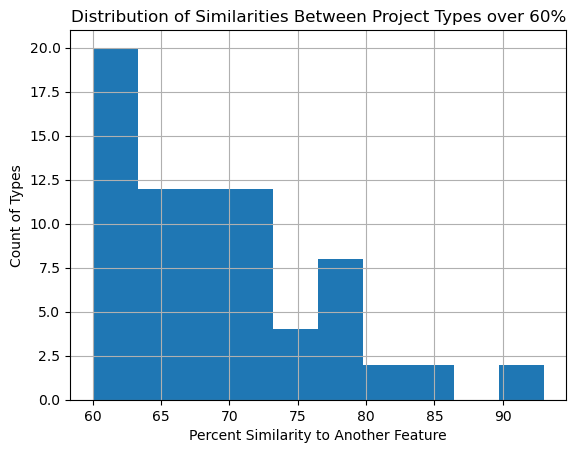

In [19]:
sims['Similarity'].hist()
plt.xlabel('Percent Similarity to Another Feature')
plt.ylabel('Count of Types')
plt.title('Distribution of Similarities Between Project Types over 60%')
plt.show()